<a href="https://colab.research.google.com/github/amsheveleva/Exploratory_data_analysis/blob/main/Colorifix_test_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python --version

Python 3.10.12


#### Introduction

At Colorifix, we routinely measure the concentration of a pigment in solution. We do so using a spectrophotometer. The spectrophotometer measures the intensity of light (amount of photons) after passing through a sample solution. Absorbance is a negative log of the ratio between intensity of light after passing through the sample vs light shining on the sample.

At Colorifix, we routinely measure the concentration of a pigment in solution. We do so using a spectrophotometer. The spectrophotometer measures the intensity of light (amount of photons) after passing through a sample solution. Absorbance is a negative log of the ratio between intensity of light after passing through the sample vs light shining on the sample.

*A=Ecl*

At Colorifix, we routinely measure the concentration of a pigment in solution. We do so using a spectrophotometer. The spectrophotometer measures the intensity of light (amount of photons) after passing through a sample solution. Absorbance is a negative log of the ratio between intensity of light after passing through the sample vs light shining on the sample.



### Part 1 of the Task

The following CSV file contains the absorbance readings of samples of a known pigment (S1) at different dilutions. Each sample, is a mixture of solvent at a constant concentration, and a pigment at a concentrations determined by the dilution factor. It also contains the absorbance reading of the blank (solvent). There are 3 replicate readings for each dilution. The undiluted standard contains 50mg/L of pigment. A sample with dilution 2 contains 25mg/L of pigment, 4 - 12.5 mg/L of pigment and so on.

The following CSV file contains the absorbance readings of samples of a known pigment (S1) at different dilutions. Each sample, is a mixture of solvent at a constant concentration, and a pigment at a concentrations determined by the dilution factor. It also contains the absorbance reading of the blank (solvent). There are 3 replicate readings for each dilution. The undiluted standard contains 50mg/L of pigment. A sample with dilution 2 contains 25mg/L of pigment, 4 - 12.5 mg/L of pigment and so on.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Import all the necessary packages
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [43]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/calibration.csv')
df.head(20)

,User: USER,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 284,Unnamed: 285,Unnamed: 286,Unnamed: 287,Unnamed: 288,Unnamed: 289,Unnamed: 290,Unnamed: 291,Unnamed: 292,Unnamed: 293
0,Path: C:\Program Files (x86)\BMG\CLARIOstar\Us...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Test ID: 1353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Test Name: Magui_spec sweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Date: 16/03/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Time: 16:23:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Absorbance spectrum,NaN,NaN,NaN,Absorbance values are displayed as OD,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),...,Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum)
9,Well,Sample,Dilution,220,222,224,226,228,230,232,...,782,784,786,788,790,792,794,796,798,800


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Columns: 294 entries, User: USER to Unnamed: 293
dtypes: object(294)
memory usage: 85.1+ KB


In [72]:
new_df = df.drop(df.index[:9])
new_df=new_df.T
new_df.head()

,9,10,11,12,13,14,15,16,17,18,...,27,28,29,30,31,32,33,34,35,36
User: USER,Well,A1,A3,A5,A7,A9,A11,B1,B3,B5,...,C11,D1,D3,D5,D7,D9,D11,E1,E3,E5
Unnamed: 1,Sample,S1,S1,S1,S1,S1,S1,S1,S1,S1,...,S1,S1,S1,S1,S1,S1,S1,Blank,Blank,Blank
Unnamed: 2,Dilution,1,2,4,8,16,32,64,128,1,...,2,4,8,16,32,64,128,1,1,1
Unnamed: 3,220,3.736,3.669,3.232,3.131,3.235,3.043,3.381,3.772,2.956,...,3.373,3.828,5.287,3.651,3.33,3.063,3.382,3.977,3.393,3.439
Unnamed: 4,222,3.389,3.651,4.083,3.328,3.784,3.826,3.484,4.212,3.329,...,3.568,4.325,4.061,3.88,3.384,3.281,4.016,3.618,3.726,3.322


In [163]:
lw=new_df[9].drop(new_df[9].index[:3]).reset_index(drop=True)
lw_n=lw.astype(float)
lw_n

0      220.0
1      222.0
2      224.0
3      226.0
4      228.0
       ...  
286    792.0
287    794.0
288    796.0
289    798.0
290    800.0
Name: 9, Length: 291, dtype: float64

In [73]:
new_df=new_df.reset_index(drop=True)
new_df.head()

,9,10,11,12,13,14,15,16,17,18,...,27,28,29,30,31,32,33,34,35,36
0,Well,A1,A3,A5,A7,A9,A11,B1,B3,B5,...,C11,D1,D3,D5,D7,D9,D11,E1,E3,E5
1,Sample,S1,S1,S1,S1,S1,S1,S1,S1,S1,...,S1,S1,S1,S1,S1,S1,S1,Blank,Blank,Blank
2,Dilution,1,2,4,8,16,32,64,128,1,...,2,4,8,16,32,64,128,1,1,1
3,220,3.736,3.669,3.232,3.131,3.235,3.043,3.381,3.772,2.956,...,3.373,3.828,5.287,3.651,3.33,3.063,3.382,3.977,3.393,3.439
4,222,3.389,3.651,4.083,3.328,3.784,3.826,3.484,4.212,3.329,...,3.568,4.325,4.061,3.88,3.384,3.281,4.016,3.618,3.726,3.322


In [122]:
transposed_df = new_df.transpose()

# Filter the transposed DataFrame based on the condition
filtered_transposed_df = transposed_df[transposed_df[1] == 'S1']

# Transpose the filtered DataFrame back to the original orientation
filtered_df_S1= filtered_transposed_df.transpose()
filtered_df_S1

,10,11,12,13,14,15,16,17,18,19,...,24,25,26,27,28,29,30,31,32,33
0,A1,A3,A5,A7,A9,A11,B1,B3,B5,B7,...,C5,C7,C9,C11,D1,D3,D5,D7,D9,D11
1,S1,S1,S1,S1,S1,S1,S1,S1,S1,S1,...,S1,S1,S1,S1,S1,S1,S1,S1,S1,S1
2,1,2,4,8,16,32,64,128,1,2,...,64,128,1,2,4,8,16,32,64,128
3,3.736,3.669,3.232,3.131,3.235,3.043,3.381,3.772,2.956,3.248,...,3.472,4.425,3.234,3.373,3.828,5.287,3.651,3.33,3.063,3.382
4,3.389,3.651,4.083,3.328,3.784,3.826,3.484,4.212,3.329,3.987,...,3.372,4.407,3.605,3.568,4.325,4.061,3.88,3.384,3.281,4.016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,0.06,0.053,0.051,0.05,0.052,0.051,0.051,0.051,0.074,0.053,...,0.051,0.05,0.058,0.053,0.052,0.056,0.051,0.049,0.051,0.051
290,0.061,0.055,0.052,0.05,0.052,0.051,0.052,0.052,0.075,0.054,...,0.052,0.05,0.059,0.054,0.052,0.056,0.051,0.05,0.051,0.051
291,0.06,0.053,0.05,0.049,0.052,0.051,0.052,0.051,0.074,0.054,...,0.051,0.05,0.058,0.053,0.051,0.056,0.051,0.049,0.051,0.051
292,0.06,0.053,0.05,0.051,0.052,0.052,0.051,0.052,0.073,0.053,...,0.051,0.051,0.059,0.053,0.053,0.057,0.052,0.05,0.051,0.051


In [123]:
filtered_df_S1=filtered_df_S1.drop(filtered_df_S1.index[:2]).reset_index(drop=True)
filtered_df_S1_t=filtered_df_S1.transpose()
filtered_df_S1_t.reset_index()


,index,0,1,2,3,4,5,6,7,8,...,282,283,284,285,286,287,288,289,290,291
0,10,1,3.736,3.389,3.636,4.059,4.713,4.672,5.287,4.919,...,0.061,0.061,0.062,0.06,0.06,0.06,0.061,0.06,0.06,0.059
1,11,2,3.669,3.651,3.956,4.445,5.287,5.287,5.287,5.287,...,0.054,0.054,0.055,0.053,0.053,0.053,0.055,0.053,0.053,0.052
2,12,4,3.232,4.083,4.167,3.785,5.164,5.028,5.112,5.287,...,0.053,0.054,0.052,0.051,0.051,0.051,0.052,0.05,0.05,0.05
3,13,8,3.131,3.328,3.814,4.026,4.893,5.287,4.825,5.287,...,0.051,0.05,0.05,0.049,0.049,0.05,0.05,0.049,0.051,0.048
4,14,16,3.235,3.784,4.502,4.987,5.287,5.287,5.287,5.287,...,0.053,0.052,0.052,0.051,0.051,0.052,0.052,0.052,0.052,0.05
5,15,32,3.043,3.826,3.722,3.854,4.973,5.287,5.145,5.287,...,0.052,0.051,0.051,0.051,0.05,0.051,0.051,0.051,0.052,0.051
6,16,64,3.381,3.484,4.089,3.829,4.271,4.722,5.033,5.175,...,0.053,0.053,0.053,0.051,0.051,0.051,0.052,0.052,0.051,0.05
7,17,128,3.772,4.212,3.998,4.006,5.002,5.106,4.814,5.287,...,0.052,0.052,0.052,0.051,0.05,0.051,0.052,0.051,0.052,0.05
8,18,1,2.956,3.329,3.306,3.651,4.246,4.593,5.065,5.287,...,0.076,0.075,0.075,0.075,0.074,0.074,0.075,0.074,0.073,0.073
9,19,2,3.248,3.987,4.444,4.681,4.528,5.07,5.115,5.287,...,0.055,0.055,0.054,0.053,0.052,0.053,0.054,0.054,0.053,0.052


In [110]:
filtered_df_S1_t_f=filtered_df_S1_t.astype(float)
filtered_df_S1_t_f.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 10 to 33
Columns: 292 entries, 0 to 291
dtypes: float64(292)
memory usage: 55.5 KB


In [137]:
filtered_df_S1_t_f['conc']=50/filtered_df_S1_t_f[0]

In [138]:
filtered_df_S1_t_f.head()

,0,1,2,3,4,5,6,7,8,9,...,283,284,285,286,287,288,289,290,291,conc
10,1.0,3.736,3.389,3.636,4.059,4.713,4.672,5.287,4.919,5.019,...,0.061,0.062,0.060,0.060,0.060,0.061,0.060,0.060,0.059,50.000
11,2.0,3.669,3.651,3.956,4.445,5.287,5.287,5.287,5.287,4.926,...,0.054,0.055,0.053,0.053,0.053,0.055,0.053,0.053,0.052,25.000
12,4.0,3.232,4.083,4.167,3.785,5.164,5.028,5.112,5.287,5.018,...,0.054,0.052,0.051,0.051,0.051,0.052,0.050,0.050,0.050,12.500
13,8.0,3.131,3.328,3.814,4.026,4.893,5.287,4.825,5.287,5.041,...,0.050,0.050,0.049,0.049,0.050,0.050,0.049,0.051,0.048,6.250
14,16.0,3.235,3.784,4.502,4.987,5.287,5.287,5.287,5.287,5.221,...,0.052,0.052,0.051,0.051,0.052,0.052,0.052,0.052,0.050,3.125


In [139]:
sample_conc_t=filtered_df_S1_t_f.copy()

In [149]:
sample_conc=sample_conc_t.set_index('conc')
samples=sample_conc.T
samples.columns= sample_conc.index
samples


conc,50.000000,25.000000,12.500000,6.250000,3.125000,1.562500,0.781250,0.390625,50.000000,25.000000,...,0.781250,0.390625,50.000000,25.000000,12.500000,6.250000,3.125000,1.562500,0.781250,0.390625
0,1.000,2.000,4.000,8.000,16.000,32.000,64.000,128.000,1.000,2.000,...,64.000,128.000,1.000,2.000,4.000,8.000,16.000,32.000,64.000,128.000
1,3.736,3.669,3.232,3.131,3.235,3.043,3.381,3.772,2.956,3.248,...,3.472,4.425,3.234,3.373,3.828,5.287,3.651,3.330,3.063,3.382
2,3.389,3.651,4.083,3.328,3.784,3.826,3.484,4.212,3.329,3.987,...,3.372,4.407,3.605,3.568,4.325,4.061,3.880,3.384,3.281,4.016
3,3.636,3.956,4.167,3.814,4.502,3.722,4.089,3.998,3.306,4.444,...,3.586,4.541,3.781,3.816,3.886,4.142,3.908,4.154,3.669,4.424
4,4.059,4.445,3.785,4.026,4.987,3.854,3.829,4.006,3.651,4.681,...,3.776,4.705,4.104,4.155,5.097,4.276,4.008,4.301,4.067,5.135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,0.060,0.053,0.051,0.050,0.052,0.051,0.051,0.051,0.074,0.053,...,0.051,0.050,0.058,0.053,0.052,0.056,0.051,0.049,0.051,0.051
288,0.061,0.055,0.052,0.050,0.052,0.051,0.052,0.052,0.075,0.054,...,0.052,0.050,0.059,0.054,0.052,0.056,0.051,0.050,0.051,0.051
289,0.060,0.053,0.050,0.049,0.052,0.051,0.052,0.051,0.074,0.054,...,0.051,0.050,0.058,0.053,0.051,0.056,0.051,0.049,0.051,0.051
290,0.060,0.053,0.050,0.051,0.052,0.052,0.051,0.052,0.073,0.053,...,0.051,0.051,0.059,0.053,0.053,0.057,0.052,0.050,0.051,0.051


In [114]:
# Filter the transposed DataFrame based on the condition
filtered_transposed_df = transposed_df[transposed_df[1] == 'Blank']

# Transpose the filtered DataFrame back to the original orientation
filtered_df_Blank= filtered_transposed_df.transpose()
filtered_df_Blank

,34,35,36
0,E1,E3,E5
1,Blank,Blank,Blank
2,1,1,1
3,3.977,3.393,3.439
4,3.618,3.726,3.322
...,...,...,...
289,0.05,0.051,0.047
290,0.049,0.051,0.048
291,0.05,0.051,0.048
292,0.05,0.052,0.047


In [121]:
filtered_df_Blank=filtered_df_Blank.drop(filtered_df_Blank.index[:2]).reset_index(drop=True)
filtered_df_Blank_t=filtered_df_Blank.transpose()
filtered_df_Blank_t.reset_index()

,index,0,1,2,3,4,5,6,7,8,...,282,283,284,285,286,287,288,289,290,291
0,34,1,3.977,3.618,4.07,3.96,4.618,5.287,5.287,5.287,...,0.051,0.05,0.049,0.05,0.05,0.05,0.049,0.05,0.05,0.049
1,35,1,3.393,3.726,4.098,3.924,4.907,4.66,5.287,5.287,...,0.052,0.052,0.052,0.05,0.05,0.051,0.051,0.051,0.052,0.05
2,36,1,3.439,3.322,4.038,5.287,5.287,4.939,5.287,5.287,...,0.049,0.048,0.048,0.047,0.047,0.047,0.048,0.048,0.047,0.047


In [125]:
filtered_df_Blank_t_f=filtered_df_Blank_t.astype(float)
filtered_df_Blank_t_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 34 to 36
Columns: 292 entries, 0 to 291
dtypes: float64(292)
memory usage: 7.0 KB


In [128]:
filtered_df_Blank_t_f.index

Int64Index([34, 35, 36], dtype='int64')

In [130]:
blank_s = filtered_df_Blank_t_f.T
blank_s.columns=filtered_df_Blank_t_f.index

In [186]:
blank_s_n=blank_s.drop(blank_s.index[:1]).reset_index(drop=True)
blank_s_n['lw']=lw_n
blank_s_n.head()

,34,35,36,lw
0,3.977,3.393,3.439,220.0
1,3.618,3.726,3.322,222.0
2,4.070,4.098,4.038,224.0
3,3.960,3.924,5.287,226.0
4,4.618,4.907,5.287,228.0


In [155]:
samples_n=samples.drop(samples.index[:1]).reset_index(drop=True)
samples_n.head()

conc,50.000000,25.000000,12.500000,6.250000,3.125000,1.562500,0.781250,0.390625,50.000000,25.000000,...,0.781250,0.390625,50.000000,25.000000,12.500000,6.250000,3.125000,1.562500,0.781250,0.390625
0,3.736,3.669,3.232,3.131,3.235,3.043,3.381,3.772,2.956,3.248,...,3.472,4.425,3.234,3.373,3.828,5.287,3.651,3.330,3.063,3.382
1,3.389,3.651,4.083,3.328,3.784,3.826,3.484,4.212,3.329,3.987,...,3.372,4.407,3.605,3.568,4.325,4.061,3.880,3.384,3.281,4.016
2,3.636,3.956,4.167,3.814,4.502,3.722,4.089,3.998,3.306,4.444,...,3.586,4.541,3.781,3.816,3.886,4.142,3.908,4.154,3.669,4.424
3,4.059,4.445,3.785,4.026,4.987,3.854,3.829,4.006,3.651,4.681,...,3.776,4.705,4.104,4.155,5.097,4.276,4.008,4.301,4.067,5.135
4,4.713,5.287,5.164,4.893,5.287,4.973,4.271,5.002,4.246,4.528,...,4.439,5.094,4.783,5.287,5.287,4.822,4.860,5.287,4.882,5.287


In [165]:
samples_n['lw']=lw_n
samples_n


conc,50.0,25.0,12.5,6.25,3.125,1.5625,0.78125,0.390625,50.0,25.0,...,0.390625,50.0,25.0,12.5,6.25,3.125,1.5625,0.78125,0.390625,lw
0,3.736,3.669,3.232,3.131,3.235,3.043,3.381,3.772,2.956,3.248,...,4.425,3.234,3.373,3.828,5.287,3.651,3.330,3.063,3.382,220.0
1,3.389,3.651,4.083,3.328,3.784,3.826,3.484,4.212,3.329,3.987,...,4.407,3.605,3.568,4.325,4.061,3.880,3.384,3.281,4.016,222.0
2,3.636,3.956,4.167,3.814,4.502,3.722,4.089,3.998,3.306,4.444,...,4.541,3.781,3.816,3.886,4.142,3.908,4.154,3.669,4.424,224.0
3,4.059,4.445,3.785,4.026,4.987,3.854,3.829,4.006,3.651,4.681,...,4.705,4.104,4.155,5.097,4.276,4.008,4.301,4.067,5.135,226.0
4,4.713,5.287,5.164,4.893,5.287,4.973,4.271,5.002,4.246,4.528,...,5.094,4.783,5.287,5.287,4.822,4.860,5.287,4.882,5.287,228.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,0.060,0.053,0.051,0.050,0.052,0.051,0.051,0.051,0.074,0.053,...,0.050,0.058,0.053,0.052,0.056,0.051,0.049,0.051,0.051,792.0
287,0.061,0.055,0.052,0.050,0.052,0.051,0.052,0.052,0.075,0.054,...,0.050,0.059,0.054,0.052,0.056,0.051,0.050,0.051,0.051,794.0
288,0.060,0.053,0.050,0.049,0.052,0.051,0.052,0.051,0.074,0.054,...,0.050,0.058,0.053,0.051,0.056,0.051,0.049,0.051,0.051,796.0
289,0.060,0.053,0.050,0.051,0.052,0.052,0.051,0.052,0.073,0.053,...,0.051,0.059,0.053,0.053,0.057,0.052,0.050,0.051,0.051,798.0


In [166]:
samples_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   50.0      291 non-null    float64
 1   25.0      291 non-null    float64
 2   12.5      291 non-null    float64
 3   6.25      291 non-null    float64
 4   3.125     291 non-null    float64
 5   1.5625    291 non-null    float64
 6   0.78125   291 non-null    float64
 7   0.390625  291 non-null    float64
 8   50.0      291 non-null    float64
 9   25.0      291 non-null    float64
 10  12.5      291 non-null    float64
 11  6.25      291 non-null    float64
 12  3.125     291 non-null    float64
 13  1.5625    291 non-null    float64
 14  0.78125   291 non-null    float64
 15  0.390625  291 non-null    float64
 16  50.0      291 non-null    float64
 17  25.0      291 non-null    float64
 18  12.5      291 non-null    float64
 19  6.25      291 non-null    float64
 20  3.125     291 non-null    float6

In [167]:
samples_n.describe().T

,count,mean,std,min,25%,50%,75%,max
conc,,,,,,,,
50.0,291.0,0.812361,1.495010,0.059,0.0780,0.164,0.5525,5.287
25.0,291.0,0.733663,1.523177,0.052,0.0630,0.111,0.3640,5.287
12.5,291.0,0.687320,1.524566,0.050,0.0565,0.083,0.2520,5.287
6.25,291.0,0.655660,1.520304,0.046,0.0510,0.069,0.1775,5.287
3.125,291.0,0.659725,1.551619,0.048,0.0530,0.066,0.1375,5.287
1.5625,291.0,0.639079,1.524458,0.046,0.0520,0.059,0.1015,5.287
0.78125,291.0,0.634052,1.497792,0.049,0.0520,0.057,0.1040,5.287
0.390625,291.0,0.645010,1.531941,0.049,0.0520,0.058,0.1045,5.287
50.0,291.0,0.818041,1.456788,0.073,0.0940,0.182,0.5825,5.287


In [189]:
blank_s_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   34      291 non-null    float64
 1   35      291 non-null    float64
 2   36      291 non-null    float64
 3   lw      291 non-null    float64
dtypes: float64(4)
memory usage: 9.2 KB


In [188]:
blank_s_n.describe().T

,count,mean,std,min,25%,50%,75%,max
34,291.0,0.647835,1.545422,0.046,0.050,0.052,0.0995,5.287
35,291.0,0.642553,1.532360,0.046,0.051,0.053,0.1025,5.287
36,291.0,0.656247,1.562059,0.044,0.048,0.051,0.1050,5.287
lw,291.0,510.000000,168.297356,220.000,365.000,510.000,655.0000,800.000


For both balnk and smamples there are intensities more then 1 this means that spectrophotometer was saturated. It usually happens at UV diapasone as this is high energy irradiation which

In [169]:
unique_conc= filtered_df_S1_t_f['conc'].unique()
unique_conc

array([50.      , 25.      , 12.5     ,  6.25    ,  3.125   ,  1.5625  ,
        0.78125 ,  0.390625])

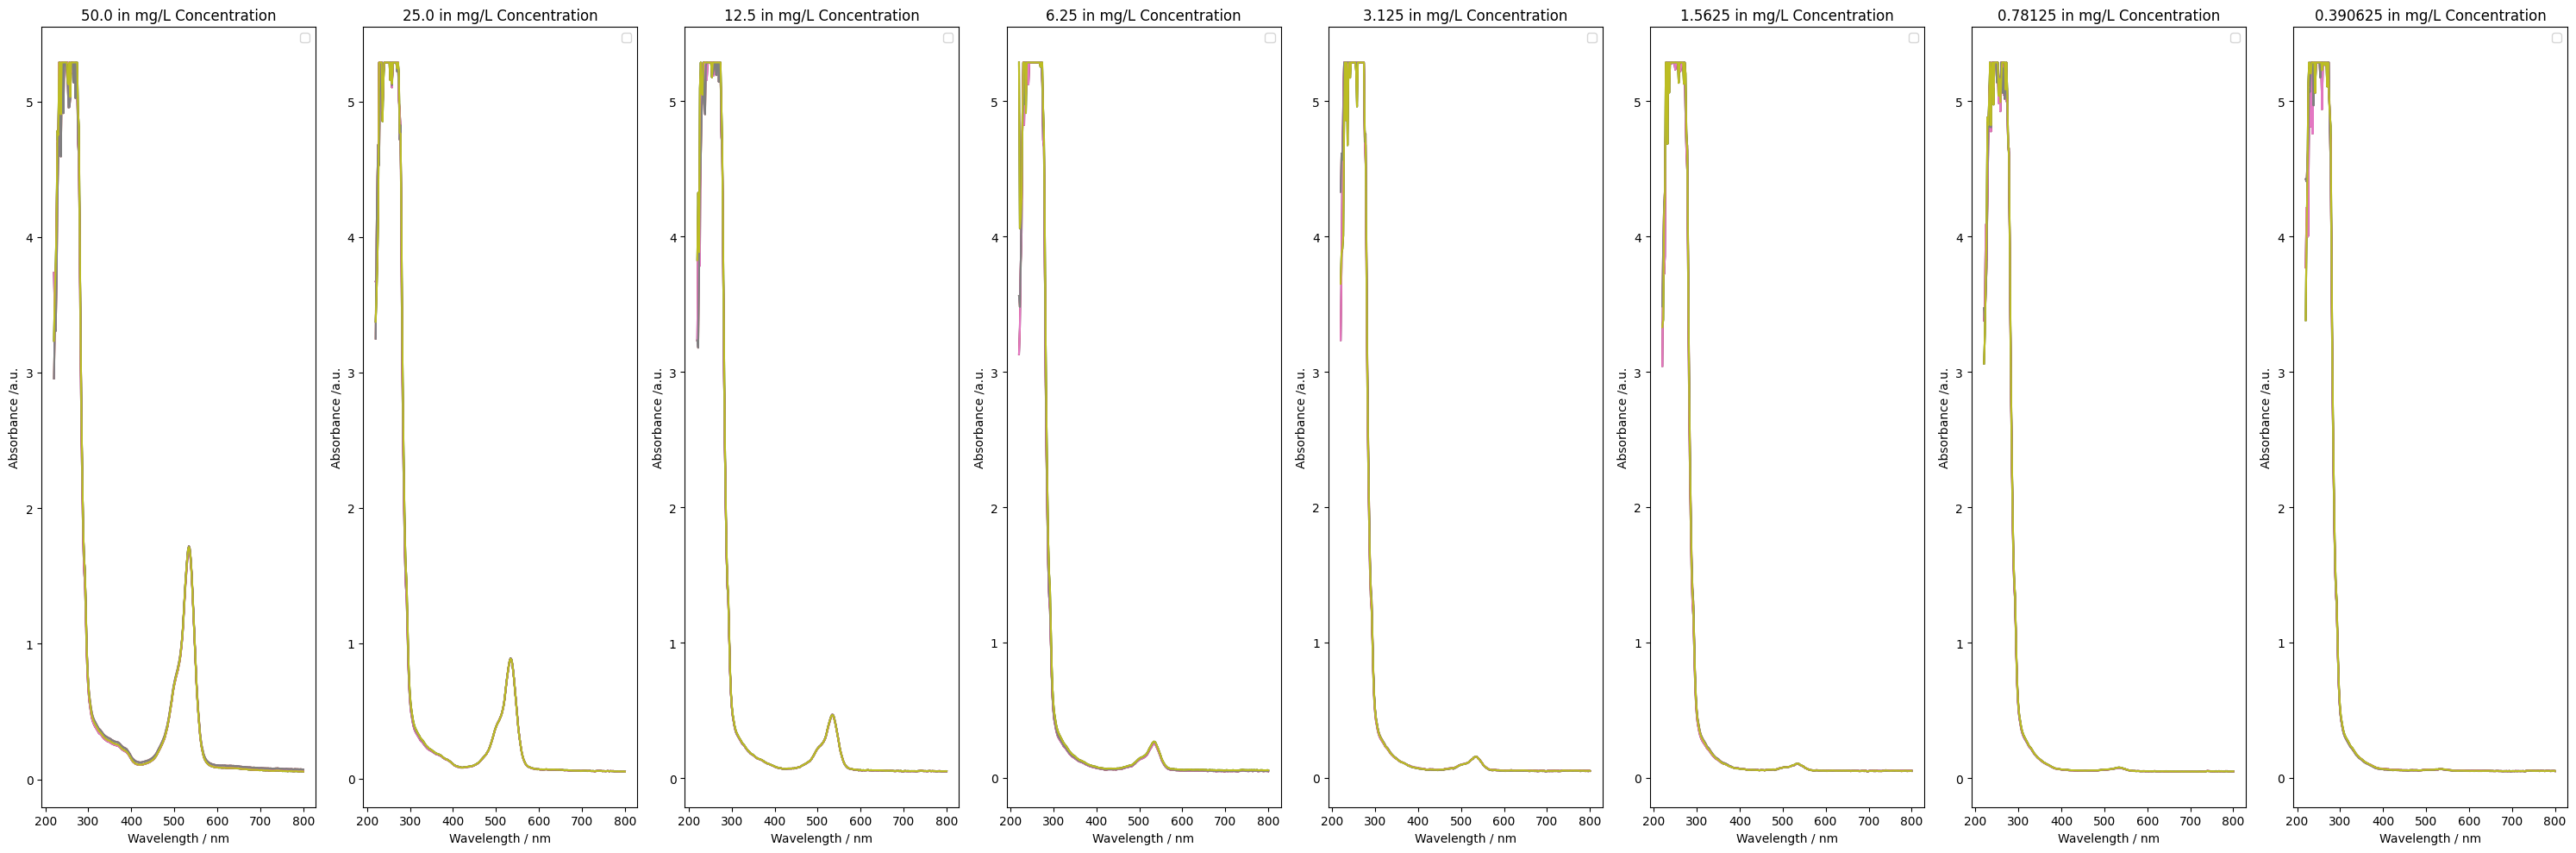

In [184]:
plot_columns_dict = {}
for value in unique_conc:
    plot_columns = [col for col in samples_n.columns if value == col]
    plot_columns_dict[value] = plot_columns

# Create subplots dynamically based on unique values
fig, axs = plt.subplots(1, len(unique_conc), figsize=(30, 10))

for idx, value in enumerate(unique_conc):
    ax = axs[idx]
    for col in plot_columns_dict[value]:
        ax.plot(samples_n['lw'], samples_n[col])

    ax.set_xlabel('Wavelength / nm')
    ax.set_ylabel('Absorbance /a.u.')
    ax.set_title(f'{value} in mg/L Concentration')
    ax.legend()

plt.tight_layout()
plt.show()

There is a saturation of the signal let's see the change after background substraction

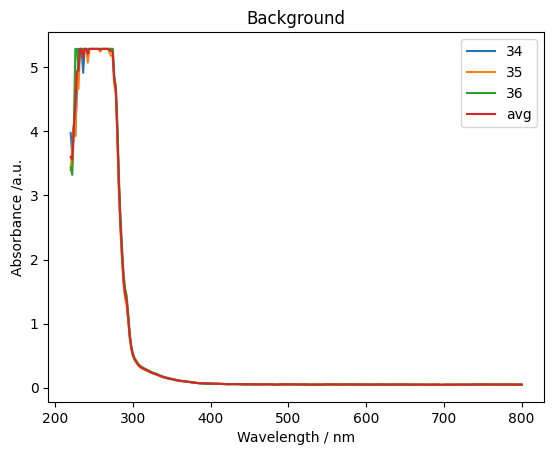

In [223]:
lw_ = 'lw'  # the column

fig, ax = plt.subplots()

# Plot each column against the x_column
for column in blank_s_n.columns:
    if column != lw_:  # Skip plotting against itself
        blank_s_n.plot(x=lw_, y=column, kind='line', ax=ax, label=column)

# Add labels and title
plt.xlabel('Wavelength / nm')
plt.ylabel('Absorbance /a.u.')
plt.title('Background')

# Add a legend to show which line represents which column
plt.legend()

# Show the plot
plt.show()

In [217]:
# lets avarage the results for background to make life a bit easy
blank_s_n['avg']=blank_s_n[[34,35,36]].mean(axis=1)
print(blank_s_n)


        34     35     36     lw       avg
0    3.977  3.393  3.439  220.0  3.603000
1    3.618  3.726  3.322  222.0  3.555333
2    4.070  4.098  4.038  224.0  4.068667
3    3.960  3.924  5.287  226.0  4.390333
4    4.618  4.907  5.287  228.0  4.937333
..     ...    ...    ...    ...       ...
286  0.050  0.051  0.047  792.0  0.049333
287  0.049  0.051  0.048  794.0  0.049333
288  0.050  0.051  0.048  796.0  0.049667
289  0.050  0.052  0.047  798.0  0.049667
290  0.049  0.050  0.047  800.0  0.048667

[291 rows x 5 columns]


In [218]:
samples_n['bg']=blank_s_n['avg']
samples_n.head()

conc,50.0,25.0,12.5,6.25,3.125,1.5625,0.78125,0.390625,50.0,25.0,...,50.0,25.0,12.5,6.25,3.125,1.5625,0.78125,0.390625,lw,bg
0,3.736,3.669,3.232,3.131,3.235,3.043,3.381,3.772,2.956,3.248,...,3.234,3.373,3.828,5.287,3.651,3.330,3.063,3.382,220.0,3.603000
1,3.389,3.651,4.083,3.328,3.784,3.826,3.484,4.212,3.329,3.987,...,3.605,3.568,4.325,4.061,3.880,3.384,3.281,4.016,222.0,3.555333
2,3.636,3.956,4.167,3.814,4.502,3.722,4.089,3.998,3.306,4.444,...,3.781,3.816,3.886,4.142,3.908,4.154,3.669,4.424,224.0,4.068667
3,4.059,4.445,3.785,4.026,4.987,3.854,3.829,4.006,3.651,4.681,...,4.104,4.155,5.097,4.276,4.008,4.301,4.067,5.135,226.0,4.390333
4,4.713,5.287,5.164,4.893,5.287,4.973,4.271,5.002,4.246,4.528,...,4.783,5.287,5.287,4.822,4.860,5.287,4.882,5.287,228.0,4.937333


In [216]:
# Initialize a dictionary to store the summed rows
avg_rows = {}

# Loop through the unique values
for value in unique_conc:
    value_columns = [col for col in samples_n.columns if value == col]
    avg_rows[value] = samples_n[value_columns].mean(axis=1)

# Create a new DataFrame from the summed rows dictionary
avg_samples = pd.DataFrame(avg_rows)
avg_samples


,50.000000,25.000000,12.500000,6.250000,3.125000,1.562500,0.781250,0.390625
0,3.308667,3.430000,3.431333,3.993333,3.739000,3.285667,3.305333,3.859667
1,3.441000,3.735333,3.862667,3.623000,4.093000,3.717000,3.379000,4.211667
2,3.574333,4.072000,3.926000,3.911333,4.325333,4.035000,3.781333,4.321000
3,3.938000,4.427000,4.402000,4.192000,4.613333,4.168667,3.890667,4.615333
4,4.580667,5.034000,5.008667,4.831333,5.144667,5.018333,4.530667,5.127667
...,...,...,...,...,...,...,...,...
286,0.064000,0.053000,0.051000,0.052000,0.050667,0.049333,0.051000,0.050667
287,0.065000,0.054333,0.052000,0.052000,0.050667,0.049667,0.051667,0.051000
288,0.064000,0.053333,0.050333,0.051667,0.050000,0.049333,0.051333,0.050667
289,0.064000,0.053000,0.051333,0.052667,0.051000,0.050333,0.051000,0.051333


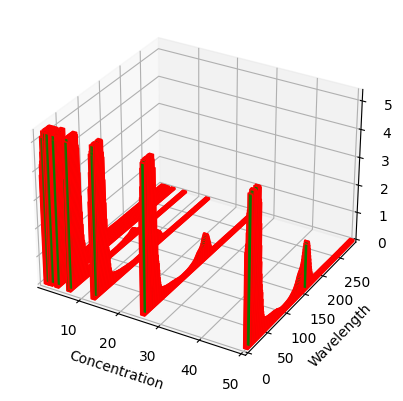

[[(50.0, 0, 0), (50.0, 0, 3.3086666666666673), (51.0, 0, 3.3086666666666673), (51.0, 0, 0)], [(25.0, 0, 0), (25.0, 0, 3.4300000000000006), (26.0, 0, 3.4300000000000006), (26.0, 0, 0)], [(12.5, 0, 0), (12.5, 0, 3.431333333333333), (13.5, 0, 3.431333333333333), (13.5, 0, 0)], [(6.25, 0, 0), (6.25, 0, 3.993333333333334), (7.25, 0, 3.993333333333334), (7.25, 0, 0)], [(3.125, 0, 0), (3.125, 0, 3.7389999999999994), (4.125, 0, 3.7389999999999994), (4.125, 0, 0)], [(1.5625, 0, 0), (1.5625, 0, 3.2856666666666663), (2.5625, 0, 3.2856666666666663), (2.5625, 0, 0)], [(0.78125, 0, 0), (0.78125, 0, 3.3053333333333335), (1.78125, 0, 3.3053333333333335), (1.78125, 0, 0)], [(0.390625, 0, 0), (0.390625, 0, 3.859666666666667), (1.390625, 0, 3.859666666666667), (1.390625, 0, 0)], [(50.0, 1, 0), (50.0, 1, 3.4410000000000003), (51.0, 1, 3.4410000000000003), (51.0, 1, 0)], [(25.0, 1, 0), (25.0, 1, 3.7353333333333336), (26.0, 1, 3.7353333333333336), (26.0, 1, 0)], [(12.5, 1, 0), (12.5, 1, 3.862666666666667), 

In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Prepare data for plotting
x = avg_samples.columns.astype(float)
y = avg_samples.index[:].astype(int)
X, Y = np.meshgrid(x, y)
Z = avg_samples.values[:, :].astype(float)

# Reshape the data for Poly3DCollection
verts = []
for i in range(len(y)):
    for j in range(len(x)):
        verts.append([(X[i, j], Y[i, j], 0),
                      (X[i, j], Y[i, j], Z[i, j]),
                      (X[i, j] + 1, Y[i, j], Z[i, j]),
                      (X[i, j] + 1, Y[i, j], 0)])


# Create a Poly3DCollection
poly3d_collection = Poly3DCollection(verts, facecolors='g', edgecolors='r', alpha=0.7)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Add the Poly3DCollection to the plot
ax.add_collection3d(poly3d_collection)

# Set labels for axes
ax.set_xlabel('Concentration')
ax.set_ylabel('Wavelength')
ax.set_zlabel('Adsorb')

# Adjust the scale of the axes
ax.set_xlim(min(x), max(x))  # Set the x-axis limits
ax.set_ylim(min(y), max(y))  # Set the y-axis limits
ax.set_zlim(0, np.max(Z))     # Set the z-axis limits

# Show the plot
plt.show()
print(verts)

In [220]:
corr_rows = {}

# Loop through the unique values
for value in avg_samples.columns:
    corr_rows[value] = avg_samples[value]-samples_n['bg']

# Create a new DataFrame from the summed rows dictionary
corr_avg_samples = pd.DataFrame(corr_rows)
corr_avg_samples

,50.000000,25.000000,12.500000,6.250000,3.125000,1.562500,0.781250,0.390625
0,-0.294333,-0.173000,-0.171667,0.390333,0.136000,-3.173333e-01,-0.297667,0.256667
1,-0.114333,0.180000,0.307333,0.067667,0.537667,1.616667e-01,-0.176333,0.656333
2,-0.494333,0.003333,-0.142667,-0.157333,0.256667,-3.366667e-02,-0.287333,0.252333
3,-0.452333,0.036667,0.011667,-0.198333,0.223000,-2.216667e-01,-0.499667,0.225000
4,-0.356667,0.096667,0.071333,-0.106000,0.207333,8.100000e-02,-0.406667,0.190333
...,...,...,...,...,...,...,...,...
286,0.014667,0.003667,0.001667,0.002667,0.001333,-1.387779e-17,0.001667,0.001333
287,0.015667,0.005000,0.002667,0.002667,0.001333,3.333333e-04,0.002333,0.001667
288,0.014333,0.003667,0.000667,0.002000,0.000333,-3.333333e-04,0.001667,0.001000
289,0.014333,0.003333,0.001667,0.003000,0.001333,6.666667e-04,0.001333,0.001667


In [222]:
corr_avg_samples['lw']=samples_n['lw']
corr_avg_samples


,50.0,25.0,12.5,6.25,3.125,1.5625,0.78125,0.390625,lw
0,-0.294333,-0.173000,-0.171667,0.390333,0.136000,-3.173333e-01,-0.297667,0.256667,220.0
1,-0.114333,0.180000,0.307333,0.067667,0.537667,1.616667e-01,-0.176333,0.656333,222.0
2,-0.494333,0.003333,-0.142667,-0.157333,0.256667,-3.366667e-02,-0.287333,0.252333,224.0
3,-0.452333,0.036667,0.011667,-0.198333,0.223000,-2.216667e-01,-0.499667,0.225000,226.0
4,-0.356667,0.096667,0.071333,-0.106000,0.207333,8.100000e-02,-0.406667,0.190333,228.0
...,...,...,...,...,...,...,...,...,...
286,0.014667,0.003667,0.001667,0.002667,0.001333,-1.387779e-17,0.001667,0.001333,792.0
287,0.015667,0.005000,0.002667,0.002667,0.001333,3.333333e-04,0.002333,0.001667,794.0
288,0.014333,0.003667,0.000667,0.002000,0.000333,-3.333333e-04,0.001667,0.001000,796.0
289,0.014333,0.003333,0.001667,0.003000,0.001333,6.666667e-04,0.001333,0.001667,798.0


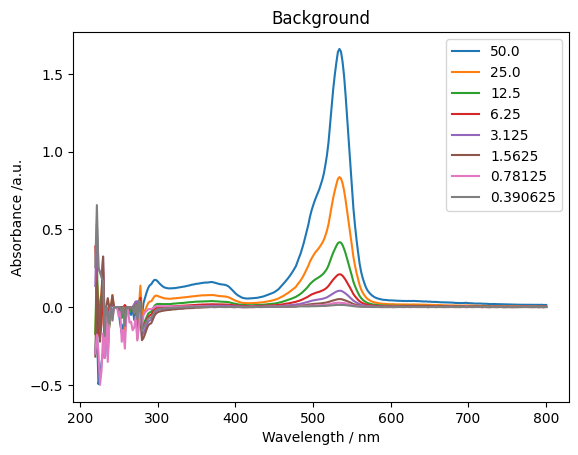

In [325]:
lw_ = 'lw'  # the column

fig, ax = plt.subplots()

# Plot each column against the x_column
for column in corr_avg_samples.columns:
    if column != lw_:  # Skip plotting against itself
       corr_avg_samples.plot(x=lw_, y=column, kind='line', ax=ax, label=column)

# Add labels and title
plt.xlabel('Wavelength / nm')
plt.ylabel('Absorbance /a.u.')
plt.title('Background')

# Add a legend to show which line represents which column
plt.legend()

# Show the plot
plt.show()

We will focus on visible range

In [247]:
corr_avg_saples_visible=corr_avg_samples[corr_avg_samples['lw']>=400]
corr_avg_saples_visible


,50.0,25.0,12.5,6.25,3.125,1.5625,0.78125,0.390625,lw
90,0.090000,0.042667,0.021667,0.011000,0.006000,1.666667e-03,1.387779e-17,0.000333,400.0
91,0.081333,0.038333,0.019667,0.011000,0.005333,1.666667e-03,1.333333e-03,0.001000,402.0
92,0.074333,0.035000,0.017667,0.009667,0.005333,6.666667e-04,1.666667e-03,0.001667,404.0
93,0.068333,0.031667,0.016333,0.008667,0.004667,1.000000e-03,6.666667e-04,0.001000,406.0
94,0.063000,0.029000,0.014667,0.007667,0.003667,3.333333e-04,3.333333e-04,0.000667,408.0
...,...,...,...,...,...,...,...,...,...
286,0.014667,0.003667,0.001667,0.002667,0.001333,-1.387779e-17,1.666667e-03,0.001333,792.0
287,0.015667,0.005000,0.002667,0.002667,0.001333,3.333333e-04,2.333333e-03,0.001667,794.0
288,0.014333,0.003667,0.000667,0.002000,0.000333,-3.333333e-04,1.666667e-03,0.001000,796.0
289,0.014333,0.003333,0.001667,0.003000,0.001333,6.666667e-04,1.333333e-03,0.001667,798.0


In [236]:
unique_conc

array([50.      , 25.      , 12.5     ,  6.25    ,  3.125   ,  1.5625  ,
        0.78125 ,  0.390625])

In [251]:
maximum2 = []
for value in avg_samples.columns:
    max_value = corr_avg_saples_visible[value].max().astype(float)
    conc_value = float(value)
    maximum2.append({'A': max_value, 'conc': conc_value})

combined_max2 = pd.DataFrame(maximum2)
print(combined_max2)


          A       conc
0  1.660000  50.000000
1  0.836333  25.000000
2  0.418000  12.500000
3  0.211667   6.250000
4  0.105667   3.125000
5  0.052000   1.562500
6  0.028667   0.781250
7  0.015000   0.390625


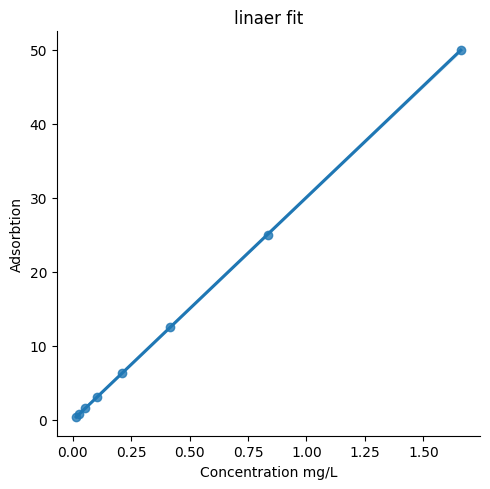

In [253]:
sns.lmplot(x='A',y='conc', data = combined_max2)
plt.xlabel('Concentration mg/L')
plt.ylabel('Absorbance /a.u.')
plt.title('linaer fit')
plt.tight_layout()
plt.show()

In [255]:
from sklearn import linear_model

Concet = combined_max2['conc'].values.reshape(len(combined_max2['conc']),1)
Ads = combined_max2['A'].values.reshape(len(combined_max2['conc']),1)

In [256]:
model1 = linear_model.LinearRegression()
model1.fit(Ads, Concet)
coeffs_m1 = np.array(list(model1.intercept_.flatten()) + list(model1.coef_.flatten()))
coeffs1 = list(coeffs_m1)
print(coeffs1)

[-0.08020684246294252, 30.1295420976869]


In [257]:
dict_values = {}
dict_values["lin"] = coeffs1
metric_LR =  pd.DataFrame(dict_values)
metric_LR.index = ['Intercept', 'Coefficient']
print(metric_LR)

                   lin
Intercept    -0.080207
Coefficient  30.129542


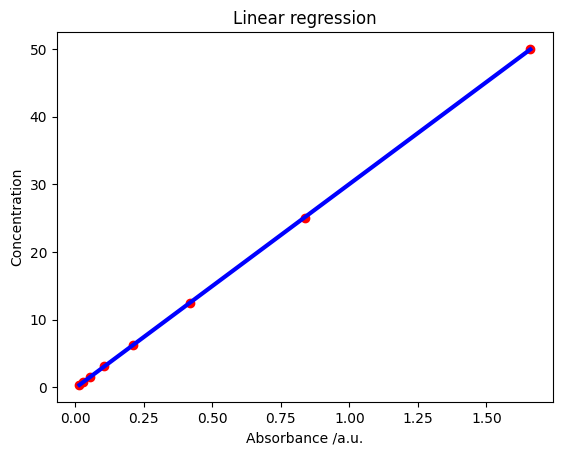

In [337]:
plt.scatter(Ads, Concet,  color='red')
plt.xlabel('Absorbance /a.u.')
plt.ylabel('Concentration')
plt.title('Linear regression')
plt.plot(Ads, model1.predict(Ads), color='blue', linewidth=3)
plt.show()

In [261]:
rsq = model1.score(Ads, Concet)
print("simple linear regression R-Square :", rsq)


simple linear regression R-Square : 0.9999869938930155


In [263]:
# let us get a more detailed model through statsmodel.
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'conc ~ A', data = combined_max2).fit()
lm1.params
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                   conc   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.613e+05
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           6.88e-16
Time:                        13:08:19   Log-Likelihood:                 11.381
No. Observations:                   8   AIC:                            -18.76
Df Residuals:                       6   BIC:                            -18.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0802      0.030     -2.662      0.0

#Task 2
The following CSV file contains the absorbance readings of a sample (X1) measured in triplicates and the absorbance readings of the blank (solvent). The concentration of the solvent is constant for each sample, and the pigment is the same as in Part 1.
Using the calibration data from Part 1, implement a mathematical model to calculate the pigment concentration in a given sample. Clearly state the assumptions of your mathematical model in the README. Calculate the pigment concentration of X1.

In [271]:
exp=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sample.csv')
exp.head(20)

,User: USER,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 284,Unnamed: 285,Unnamed: 286,Unnamed: 287,Unnamed: 288,Unnamed: 289,Unnamed: 290,Unnamed: 291,Unnamed: 292,Unnamed: 293
0,Path: C:\Program Files (x86)\BMG\CLARIOstar\Us...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Test ID: 1122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Test Name: Magui_spec sweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Date: 21/02/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Time: 17:46:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Absorbance spectrum,NaN,NaN,NaN,Absorbance values are displayed as OD,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),...,Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum)
9,Well,Sample,Dilution,220,222,224,226,228,230,232,...,782,784,786,788,790,792,794,796,798,800


In [275]:
new_exp = exp.drop(exp.index[:10])
new_exp.head()

,User: USER,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 284,Unnamed: 285,Unnamed: 286,Unnamed: 287,Unnamed: 288,Unnamed: 289,Unnamed: 290,Unnamed: 291,Unnamed: 292,Unnamed: 293
10,A1,X1,1,1.251,0.334,0.301,0.885,0.292,0,0,...,0.016,0.016,0.016,0.016,0.016,0.015,0.015,0.016,0.016,0.014
11,A2,X1,1,1.251,0.334,0.301,0.885,0.317,0,0,...,0.023,0.023,0.023,0.023,0.023,0.021,0.022,0.021,0.022,0.022
12,A3,X1,1,-0.377,-0.408,0.301,0.684,-0.046,0,0,...,0.018,0.017,0.017,0.018,0.017,0.016,0.017,0.016,0.015,0.015
13,B1,Blank,1,3.977,3.618,4.07,3.96,4.618,5.287,5.287,...,0.051,0.05,0.049,0.05,0.05,0.05,0.049,0.05,0.05,0.049
14,B2,Blank,1,3.393,3.726,4.098,3.924,4.907,4.66,5.287,...,0.052,0.052,0.052,0.05,0.05,0.051,0.051,0.051,0.052,0.05


In [276]:
filtered_exp = new_exp[new_exp['Unnamed: 1'] == 'X1']

# Transpose the filtered DataFrame back to the original orientation
filtered_exp_X1= filtered_exp.transpose()
filtered_exp_X1

,10,11,12
User: USER,A1,A2,A3
Unnamed: 1,X1,X1,X1
Unnamed: 2,1,1,1
Unnamed: 3,1.251,1.251,-0.377
Unnamed: 4,0.334,0.334,-0.408
...,...,...,...
Unnamed: 289,0.015,0.021,0.016
Unnamed: 290,0.015,0.022,0.017
Unnamed: 291,0.016,0.021,0.016
Unnamed: 292,0.016,0.022,0.015


In [315]:
new_exp_ = filtered_exp_X1.drop(filtered_exp_X1.index[:3]).reset_index(drop=True)
new_exp_.head()

,10,11,12
0,1.251,1.251,-0.377
1,0.334,0.334,-0.408
2,0.301,0.301,0.301
3,0.885,0.885,0.684
4,0.292,0.317,-0.046


In [316]:
new_exp_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   10      291 non-null    object
 1   11      291 non-null    object
 2   12      291 non-null    object
dtypes: object(3)
memory usage: 6.9+ KB


In [317]:
exp_=new_exp_.astype(float)

In [318]:
# lets avarage the results for background to make life a bit easy
exp_['avg']=exp_.mean(axis=1)
exp_


,10,11,12,avg
0,1.251,1.251,-0.377,0.708333
1,0.334,0.334,-0.408,0.086667
2,0.301,0.301,0.301,0.301000
3,0.885,0.885,0.684,0.818000
4,0.292,0.317,-0.046,0.187667
...,...,...,...,...
286,0.015,0.021,0.016,0.017333
287,0.015,0.022,0.017,0.018000
288,0.016,0.021,0.016,0.017667
289,0.016,0.022,0.015,0.017667


In [319]:
explw=exp.transpose()
lw_=explw[9].drop(explw[9].index[:3]).reset_index(drop=True)
lw_n_=lw.astype(float)
lw_n_

0      220.0
1      222.0
2      224.0
3      226.0
4      228.0
       ...  
286    792.0
287    794.0
288    796.0
289    798.0
290    800.0
Name: 9, Length: 291, dtype: float64

In [320]:
filtered_exp_b = new_exp[new_exp['Unnamed: 1'] == 'Blank']

# Transpose the filtered DataFrame back to the original orientation
filtered_exp_Bl= filtered_exp_b.transpose()
filtered_exp_Bl

,13,14,15
User: USER,B1,B2,B3
Unnamed: 1,Blank,Blank,Blank
Unnamed: 2,1,1,1
Unnamed: 3,3.977,3.393,3.439
Unnamed: 4,3.618,3.726,3.322
...,...,...,...
Unnamed: 289,0.05,0.051,0.047
Unnamed: 290,0.049,0.051,0.048
Unnamed: 291,0.05,0.051,0.048
Unnamed: 292,0.05,0.052,0.047


In [321]:
new_bg_ = filtered_exp_Bl.drop(filtered_exp_Bl.index[:3]).reset_index(drop=True)
new_bg_.head()

,13,14,15
0,3.977,3.393,3.439
1,3.618,3.726,3.322
2,4.07,4.098,4.038
3,3.96,3.924,5.287
4,4.618,4.907,5.287


In [322]:
bg_=new_bg_.astype(float)

In [323]:
bg_['avg']=bg_.mean(axis=1)
bg_

,13,14,15,avg
0,3.977,3.393,3.439,3.603000
1,3.618,3.726,3.322,3.555333
2,4.070,4.098,4.038,4.068667
3,3.960,3.924,5.287,4.390333
4,4.618,4.907,5.287,4.937333
...,...,...,...,...
286,0.050,0.051,0.047,0.049333
287,0.049,0.051,0.048,0.049333
288,0.050,0.051,0.048,0.049667
289,0.050,0.052,0.047,0.049667


In [324]:
exp_['bg_avg']=bg_['avg']
exp_['lw']=lw_n_
exp_

,10,11,12,avg,bg_avg,lw
0,1.251,1.251,-0.377,0.708333,3.603000,220.0
1,0.334,0.334,-0.408,0.086667,3.555333,222.0
2,0.301,0.301,0.301,0.301000,4.068667,224.0
3,0.885,0.885,0.684,0.818000,4.390333,226.0
4,0.292,0.317,-0.046,0.187667,4.937333,228.0
...,...,...,...,...,...,...
286,0.015,0.021,0.016,0.017333,0.049333,792.0
287,0.015,0.022,0.017,0.018000,0.049333,794.0
288,0.016,0.021,0.016,0.017667,0.049667,796.0
289,0.016,0.022,0.015,0.017667,0.049667,798.0


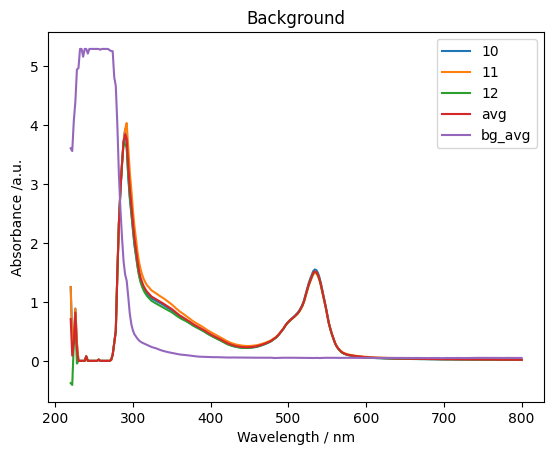

In [326]:
lw2 = 'lw'  # the column

fig, ax = plt.subplots()

# Plot each column against the x_column
for column in exp_.columns:
    if column != lw_:  # Skip plotting against itself
       exp_.plot(x=lw2, y=column, kind='line', ax=ax, label=column)

# Add labels and title
plt.xlabel('Wavelength / nm')
plt.ylabel('Absorbance /a.u.')
plt.title('Background and Experiment')

# Add a legend to show which line represents which column
plt.legend()

# Show the plot
plt.show()

It looks like bg corrextion was done before

In [330]:
exp_visible=exp_[exp_['lw']>=400]
exp_visible


,10,11,12,avg,bg_avg,lw
90,0.433,0.487,0.429,0.449667,0.064667,400.0
91,0.418,0.472,0.415,0.435000,0.063000,402.0
92,0.404,0.457,0.401,0.420667,0.062000,404.0
93,0.392,0.443,0.389,0.408000,0.062667,406.0
94,0.378,0.430,0.375,0.394333,0.062333,408.0
...,...,...,...,...,...,...
286,0.015,0.021,0.016,0.017333,0.049333,792.0
287,0.015,0.022,0.017,0.018000,0.049333,794.0
288,0.016,0.021,0.016,0.017667,0.049667,796.0
289,0.016,0.022,0.015,0.017667,0.049667,798.0


In [332]:
max_A = exp_visible['avg'].max().astype(float)
max_A

1.5156666666666665

In [336]:
concentration= -0.802+30.1295*max_A
print('Predicted value is '+str(concentration)+' mg/L')

Predicted value is 44.86427883333333 mg/L


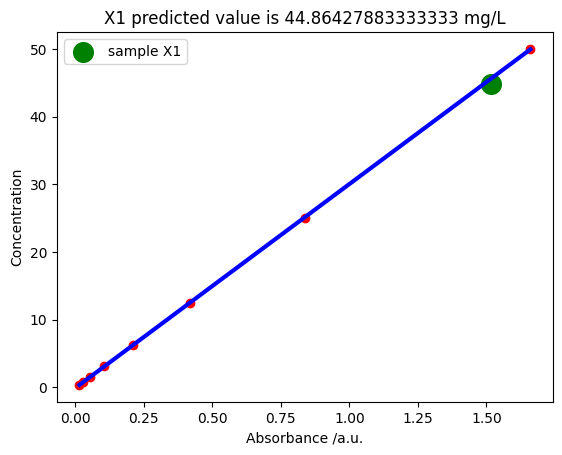

In [347]:
plt.scatter(Ads, Concet,  color='red')
plt.scatter(max_A, concentration,  color='green', s=200, label='sample X1')
plt.xlabel('Absorbance /a.u.')
plt.ylabel('Concentration')
plt.title('X1 predicted value is 44.86427883333333 mg/L')
plt.legend()
plt.plot(Ads, model1.predict(Ads), color='blue', linewidth=3)
plt.show()